# Spark
Play with different functionalities of spark (pyspark) in Jypyter notebook

In [1]:
import pandas as pd
from pyspark.sql import SparkSession
import pyspark.sql.functions as F
spark = SparkSession.builder.appName("notebook").getOrCreate()

# Read csv

In [2]:
file_name="data/results.csv"
df = spark.read.options(header="true").csv(file_name)

# Show dataframe

In [3]:
df.show(4)

+----------+---------+---------+----------+----------+----------+-------+--------+-------+
|      date|home_team|away_team|home_score|away_score|tournament|   city| country|neutral|
+----------+---------+---------+----------+----------+----------+-------+--------+-------+
|1872-11-30| Scotland|  England|         0|         0|  Friendly|Glasgow|Scotland|  FALSE|
|1873-03-08|  England| Scotland|         4|         2|  Friendly| London| England|  FALSE|
|1874-03-07| Scotland|  England|         2|         1|  Friendly|Glasgow|Scotland|  FALSE|
|1875-03-06|  England| Scotland|         2|         2|  Friendly| London| England|  FALSE|
+----------+---------+---------+----------+----------+----------+-------+--------+-------+
only showing top 4 rows



In [4]:
df.columns

['date',
 'home_team',
 'away_team',
 'home_score',
 'away_score',
 'tournament',
 'city',
 'country',
 'neutral']

In [5]:
df.dtypes

[('date', 'string'),
 ('home_team', 'string'),
 ('away_team', 'string'),
 ('home_score', 'string'),
 ('away_score', 'string'),
 ('tournament', 'string'),
 ('city', 'string'),
 ('country', 'string'),
 ('neutral', 'string')]

In [6]:
df.schema

StructType(List(StructField(date,StringType,true),StructField(home_team,StringType,true),StructField(away_team,StringType,true),StructField(home_score,StringType,true),StructField(away_score,StringType,true),StructField(tournament,StringType,true),StructField(city,StringType,true),StructField(country,StringType,true),StructField(neutral,StringType,true)))

In [7]:
cols = ['date', 'home_team', 'away_team', 'home_score', 'away_score']
df[cols].show(4)

+----------+---------+---------+----------+----------+
|      date|home_team|away_team|home_score|away_score|
+----------+---------+---------+----------+----------+
|1872-11-30| Scotland|  England|         0|         0|
|1873-03-08|  England| Scotland|         4|         2|
|1874-03-07| Scotland|  England|         2|         1|
|1875-03-06|  England| Scotland|         2|         2|
+----------+---------+---------+----------+----------+
only showing top 4 rows



# Rename columns
Spark dataframes are immutable. So, you need to create a new dataframe with new names.

In [8]:
df2 = df.toDF('match_date', 'home_team_name', 'away_team_name', 'home_score', 'away_score', 'tournament',
              'city', 'country', 'neutral')
df2.show(3)

+----------+--------------+--------------+----------+----------+----------+-------+--------+-------+
|match_date|home_team_name|away_team_name|home_score|away_score|tournament|   city| country|neutral|
+----------+--------------+--------------+----------+----------+----------+-------+--------+-------+
|1872-11-30|      Scotland|       England|         0|         0|  Friendly|Glasgow|Scotland|  FALSE|
|1873-03-08|       England|      Scotland|         4|         2|  Friendly| London| England|  FALSE|
|1874-03-07|      Scotland|       England|         2|         1|  Friendly|Glasgow|Scotland|  FALSE|
+----------+--------------+--------------+----------+----------+----------+-------+--------+-------+
only showing top 3 rows



## Rename individual columns (one at a time)

In [9]:
df2 = df.withColumnRenamed('date', 'match_date').withColumnRenamed('neutral', 'blah')
df2.show(3)

+----------+---------+---------+----------+----------+----------+-------+--------+-----+
|match_date|home_team|away_team|home_score|away_score|tournament|   city| country| blah|
+----------+---------+---------+----------+----------+----------+-------+--------+-----+
|1872-11-30| Scotland|  England|         0|         0|  Friendly|Glasgow|Scotland|FALSE|
|1873-03-08|  England| Scotland|         4|         2|  Friendly| London| England|FALSE|
|1874-03-07| Scotland|  England|         2|         1|  Friendly|Glasgow|Scotland|FALSE|
+----------+---------+---------+----------+----------+----------+-------+--------+-----+
only showing top 3 rows



# Drop columns

In [10]:
df.drop('tournament', 'neutral').show(3)

+----------+---------+---------+----------+----------+-------+--------+
|      date|home_team|away_team|home_score|away_score|   city| country|
+----------+---------+---------+----------+----------+-------+--------+
|1872-11-30| Scotland|  England|         0|         0|Glasgow|Scotland|
|1873-03-08|  England| Scotland|         4|         2| London| England|
|1874-03-07| Scotland|  England|         2|         1|Glasgow|Scotland|
+----------+---------+---------+----------+----------+-------+--------+
only showing top 3 rows



# Filtering

In [11]:
df[(df.city == 'London') & (df.away_score > 5)].show(5)

+----------+---------+---------+----------+----------+----------+------+-------+-------+
|      date|home_team|away_team|home_score|away_score|tournament|  city|country|neutral|
+----------+---------+---------+----------+----------+----------+------+-------+-------+
|1881-03-12|  England| Scotland|         1|         6|  Friendly|London|England|  FALSE|
|1953-11-25|  England|  Hungary|         3|         6|  Friendly|London|England|  FALSE|
|2018-04-15|   Barawa|Yorkshire|         2|         7|  Friendly|London|England|  FALSE|
+----------+---------+---------+----------+----------+----------+------+-------+-------+



# Add columns

In [12]:
df = df.withColumn('goal_dif', df.home_score - df.away_score)
df.show(5)

+----------+---------+---------+----------+----------+----------+-------+--------+-------+--------+
|      date|home_team|away_team|home_score|away_score|tournament|   city| country|neutral|goal_dif|
+----------+---------+---------+----------+----------+----------+-------+--------+-------+--------+
|1872-11-30| Scotland|  England|         0|         0|  Friendly|Glasgow|Scotland|  FALSE|     0.0|
|1873-03-08|  England| Scotland|         4|         2|  Friendly| London| England|  FALSE|     2.0|
|1874-03-07| Scotland|  England|         2|         1|  Friendly|Glasgow|Scotland|  FALSE|     1.0|
|1875-03-06|  England| Scotland|         2|         2|  Friendly| London| England|  FALSE|     0.0|
|1876-03-04| Scotland|  England|         3|         0|  Friendly|Glasgow|Scotland|  FALSE|     3.0|
+----------+---------+---------+----------+----------+----------+-------+--------+-------+--------+
only showing top 5 rows



# Fill NAs

In [13]:
df.fillna(0).show(2)

+----------+---------+---------+----------+----------+----------+-------+--------+-------+--------+
|      date|home_team|away_team|home_score|away_score|tournament|   city| country|neutral|goal_dif|
+----------+---------+---------+----------+----------+----------+-------+--------+-------+--------+
|1872-11-30| Scotland|  England|         0|         0|  Friendly|Glasgow|Scotland|  FALSE|     0.0|
|1873-03-08|  England| Scotland|         4|         2|  Friendly| London| England|  FALSE|     2.0|
+----------+---------+---------+----------+----------+----------+-------+--------+-------+--------+
only showing top 2 rows



# Aggregation

In [14]:
df.groupby(['home_team', 'away_team']) \
    .agg({'goal_dif': 'mean', 'away_score': 'min'}).show(5)

+----------+--------------+-------------------+---------------+
| home_team|     away_team|      avg(goal_dif)|min(away_score)|
+----------+--------------+-------------------+---------------+
|Bangladesh|      Malaysia|               -3.5|              1|
|   Belgium|    San Marino|                8.0|              0|
|  Cambodia|Chinese Taipei|               -1.0|              0|
|    Canada|          Iran|-0.3333333333333333|              0|
|     Chile|       Uruguay|-0.2916666666666667|              0|
+----------+--------------+-------------------+---------------+
only showing top 5 rows



# Transformation
Use pyspark built-in functions as much as possible (for intance instead of numpy or custom functions)

## Simple transformation

In [15]:
import pyspark.sql.functions as F
df.withColumn('log_goal_dif', F.log(df.goal_dif)).show(4)

+----------+---------+---------+----------+----------+----------+-------+--------+-------+--------+------------------+
|      date|home_team|away_team|home_score|away_score|tournament|   city| country|neutral|goal_dif|      log_goal_dif|
+----------+---------+---------+----------+----------+----------+-------+--------+-------+--------+------------------+
|1872-11-30| Scotland|  England|         0|         0|  Friendly|Glasgow|Scotland|  FALSE|     0.0|              null|
|1873-03-08|  England| Scotland|         4|         2|  Friendly| London| England|  FALSE|     2.0|0.6931471805599453|
|1874-03-07| Scotland|  England|         2|         1|  Friendly|Glasgow|Scotland|  FALSE|     1.0|               0.0|
|1875-03-06|  England| Scotland|         2|         2|  Friendly| London| England|  FALSE|     0.0|              null|
+----------+---------+---------+----------+----------+----------+-------+--------+-------+--------+------------------+
only showing top 4 rows



## Conditional transformation

In [16]:
df = df.withColumn('home_result',
                   F.when(df.goal_dif < 0, "L") \
                   .when(df.goal_dif == 0, "D") \
                   .otherwise('W')
                  )
df.show(10)

+----------+---------+---------+----------+----------+----------+-------+--------+-------+--------+-----------+
|      date|home_team|away_team|home_score|away_score|tournament|   city| country|neutral|goal_dif|home_result|
+----------+---------+---------+----------+----------+----------+-------+--------+-------+--------+-----------+
|1872-11-30| Scotland|  England|         0|         0|  Friendly|Glasgow|Scotland|  FALSE|     0.0|          D|
|1873-03-08|  England| Scotland|         4|         2|  Friendly| London| England|  FALSE|     2.0|          W|
|1874-03-07| Scotland|  England|         2|         1|  Friendly|Glasgow|Scotland|  FALSE|     1.0|          W|
|1875-03-06|  England| Scotland|         2|         2|  Friendly| London| England|  FALSE|     0.0|          D|
|1876-03-04| Scotland|  England|         3|         0|  Friendly|Glasgow|Scotland|  FALSE|     3.0|          W|
|1876-03-25| Scotland|    Wales|         4|         0|  Friendly|Glasgow|Scotland|  FALSE|     4.0|     

In [17]:
df = df.drop('home_result')
df.show(5)

+----------+---------+---------+----------+----------+----------+-------+--------+-------+--------+
|      date|home_team|away_team|home_score|away_score|tournament|   city| country|neutral|goal_dif|
+----------+---------+---------+----------+----------+----------+-------+--------+-------+--------+
|1872-11-30| Scotland|  England|         0|         0|  Friendly|Glasgow|Scotland|  FALSE|     0.0|
|1873-03-08|  England| Scotland|         4|         2|  Friendly| London| England|  FALSE|     2.0|
|1874-03-07| Scotland|  England|         2|         1|  Friendly|Glasgow|Scotland|  FALSE|     1.0|
|1875-03-06|  England| Scotland|         2|         2|  Friendly| London| England|  FALSE|     0.0|
|1876-03-04| Scotland|  England|         3|         0|  Friendly|Glasgow|Scotland|  FALSE|     3.0|
+----------+---------+---------+----------+----------+----------+-------+--------+-------+--------+
only showing top 5 rows



# UDF (User Defined Function)
When Python is really necessary for a function, create a UDF.

UDF has to be **deterministic** (this is the spark's assumption and may run the function only once, even when called multiple times)

In [18]:
from pyspark.sql.types import IntegerType
fn_double = F.udf(lambda x: int(x) * 2, IntegerType())
df.withColumn('dbl_h_score', fn_double(df.home_score)).show(5)

+----------+---------+---------+----------+----------+----------+-------+--------+-------+--------+-----------+
|      date|home_team|away_team|home_score|away_score|tournament|   city| country|neutral|goal_dif|dbl_h_score|
+----------+---------+---------+----------+----------+----------+-------+--------+-------+--------+-----------+
|1872-11-30| Scotland|  England|         0|         0|  Friendly|Glasgow|Scotland|  FALSE|     0.0|          0|
|1873-03-08|  England| Scotland|         4|         2|  Friendly| London| England|  FALSE|     2.0|          8|
|1874-03-07| Scotland|  England|         2|         1|  Friendly|Glasgow|Scotland|  FALSE|     1.0|          4|
|1875-03-06|  England| Scotland|         2|         2|  Friendly| London| England|  FALSE|     0.0|          4|
|1876-03-04| Scotland|  England|         3|         0|  Friendly|Glasgow|Scotland|  FALSE|     3.0|          6|
+----------+---------+---------+----------+----------+----------+-------+--------+-------+--------+-----

# Merge/Join

In [19]:
df[['date', 'home_team', 'away_team', 'home_score', 'away_score']].join(
    df[['date', 'home_team', 'away_team', 'home_score', 'away_score']],
    on = ['home_team', 'away_team'],
    how = 'inner'
    ).show()

+---------+---------+----------+----------+----------+----------+----------+----------+
|home_team|away_team|      date|home_score|away_score|      date|home_score|away_score|
+---------+---------+----------+----------+----------+----------+----------+----------+
| Scotland|  England|1872-11-30|         0|         0|2017-06-10|         2|         2|
| Scotland|  England|1872-11-30|         0|         0|2014-11-18|         1|         3|
| Scotland|  England|1872-11-30|         0|         0|1999-11-13|         0|         2|
| Scotland|  England|1872-11-30|         0|         0|1989-05-27|         0|         2|
| Scotland|  England|1872-11-30|         0|         0|1987-05-23|         0|         0|
| Scotland|  England|1872-11-30|         0|         0|1985-05-25|         1|         0|
| Scotland|  England|1872-11-30|         0|         0|1984-05-26|         1|         1|
| Scotland|  England|1872-11-30|         0|         0|1982-05-29|         0|         1|
| Scotland|  England|1872-11-30|

In [20]:
# left = df[['date', 'home_team', 'away_team', 'home_score', 'away_score']]
# right = df[['date', 'home_team', 'away_team', 'home_score', 'away_score']]
# left.join(right,
#           [(left.home_team == right.away_team) & (left.away_team == right.home_team)],
#           how = 'inner'
#     ).show()

# Describe

In [21]:
df[['date', 'home_team', 'away_team', 'home_score', 'away_score']].describe().show()

+-------+----------+-------------+-------------+------------------+------------------+
|summary|      date|    home_team|    away_team|        home_score|        away_score|
+-------+----------+-------------+-------------+------------------+------------------+
|  count|     41586|        41586|        41586|             41586|             41586|
|   mean|      null|         null|         null| 1.745755783196268| 1.187587168758717|
| stddev|      null|         null|         null|1.7537803404769956|1.4053234683358855|
|    min|1872-11-30|     Abkhazia|     Abkhazia|                 0|                 0|
|    max|2020-02-01|Åland Islands|Åland Islands|                 9|                 9|
+-------+----------+-------------+-------------+------------------+------------------+



# Charting
Convert to pandas dataframe and chart

For large dataframes, **sample** or **limit** the dataframe before converting to pandas.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017F42273B88>]],
      dtype=object)

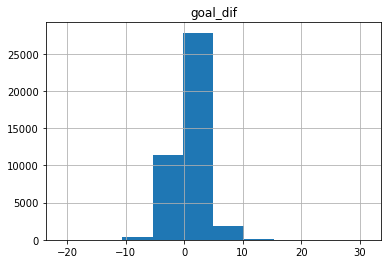

In [22]:
df[['goal_dif']].toPandas().hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017F436D5D08>]],
      dtype=object)

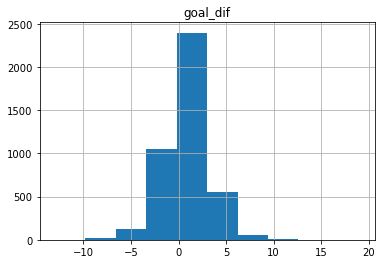

In [23]:
df[['goal_dif']].sample(False, 0.1).toPandas().hist()

# SQL style where

In [24]:
df.where("home_team = 'Brazil' and away_score > 5").show()

+----------+---------+---------+----------+----------+--------------+--------------+-------+-------+--------+
|      date|home_team|away_team|home_score|away_score|    tournament|          city|country|neutral|goal_dif|
+----------+---------+---------+----------+----------+--------------+--------------+-------+-------+--------+
|1920-09-18|   Brazil|  Uruguay|         0|         6|  Copa América|  Viña del Mar|  Chile|   TRUE|    -6.0|
|2014-07-08|   Brazil|  Germany|         1|         7|FIFA World Cup|Belo Horizonte| Brazil|  FALSE|    -6.0|
+----------+---------+---------+----------+----------+--------------+--------------+-------+-------+--------+



# SQL

In [25]:
df.createOrReplaceGlobalTempView('df_view')
df2 = spark.sql("""
                    select 
                        date, home_team, away_team, home_score, away_score
                    from 
                        global_temp.df_view
                    where 
                        home_score > 4
                        and away_score > 4
                    """)
df2.show()

+----------+-----------+----------------+----------+----------+
|      date|  home_team|       away_team|home_score|away_score|
+----------+-----------+----------------+----------+----------+
|1912-03-24|Netherlands|         Germany|         5|         5|
|1924-07-28|    Finland|          Sweden|         5|         7|
|1928-05-06|    Hungary|         Austria|         5|         5|
|1937-05-17|     Uganda|           Kenya|         9|         5|
|1938-06-05|     Brazil|          Poland|         6|         5|
|1947-06-28|New Zealand|    South Africa|         5|         6|
|1950-10-15|Switzerland|     Netherlands|         7|         5|
|1951-11-25|Netherlands|         Belgium|         6|         7|
|1954-06-26|Switzerland|         Austria|         5|         7|
|1956-11-16|  Indonesia|   United States|         7|         5|
|1957-08-31|  Singapore|Vietnam Republic|         5|         5|
|1958-08-13|     Norway|       German DR|         6|         5|
|1964-10-09|     Uganda|         Burundi

In [26]:
spark.catalog.dropGlobalTempView("df_view")